In [6]:
import numpy as np

# Parameters
num_players = 4          # Total players
num_actions = 3          # Each player has 3 possible actions
num_rounds = 500         # Number of repeated rounds
eta = 0.1                # Learning rate for Hedge algorithm

# Creation of general sum game
# This is a 5D tensor: (a1, a2, a3, a4, player_idx)
# Each entry gives the payoff for a player given all 4 players' actions
payoff_tensor = np.random.rand(num_actions, num_actions, num_actions, num_actions, num_players)

# Initialize weights
# weights[i][a] is the current weight of player i on action a
weights = np.ones((num_players, num_actions))

# Track Metrics
history_actions = []
history_rewards = np.zeros((num_players, num_rounds))
history_regrets = np.zeros((num_players, num_rounds))

# Main
for t in range(num_rounds):
    # Compute mixed strategies (convert weights to probability distributions)
    probs = weights / weights.sum(axis=1, keepdims=True)

    # Sample actions for each player
    actions = np.array([
        np.random.choice(num_actions, p=probs[i])
        for i in range(num_players)
    ])
    history_actions.append(actions)

    # Determine payoffs based on the joint action
    rewards = payoff_tensor[tuple(actions)]

    # For each player: update Hedge weights and track regret
    for i in range(num_players):
        # Estimate counterfactual payoffs for all possible actions
        counterfactual_payoffs = np.zeros(num_actions)
        for a in range(num_actions):
            counterfactual_action = actions.copy()
            counterfactual_action[i] = a
            counterfactual_payoffs[a] = payoff_tensor[tuple(counterfactual_action)][i]

        # Calculate regret: best payoff - actual payoff
        best_response = np.max(counterfactual_payoffs)
        actual = rewards[i]
        regret = best_response - actual

        # Log
        history_rewards[i, t] = actual
        history_regrets[i, t] = regret

        # Hedge update
        weights[i] *= np.exp(eta * counterfactual_payoffs)

# Output results
print("Final average regrets per player:")
print(history_regrets.mean(axis=1))

print("Final average payoffs per player:")
print(history_rewards.mean(axis=1))

print("Final action distribution weights:")
print(weights / weights.sum(axis=1, keepdims=True))


Final average regrets per player:
[0.10591595 0.09285815 0.09421637 0.15179332]
Final average payoffs per player:
[0.72549938 0.7490227  0.69049951 0.73693659]
Final action distribution weights:
[[9.99973301e-01 2.23437072e-14 2.66988193e-05]
 [2.03278823e-11 9.88212175e-04 9.99011788e-01]
 [4.13755984e-07 9.99999574e-01 1.24744996e-08]
 [5.65486822e-12 9.99999999e-01 1.42273737e-09]]


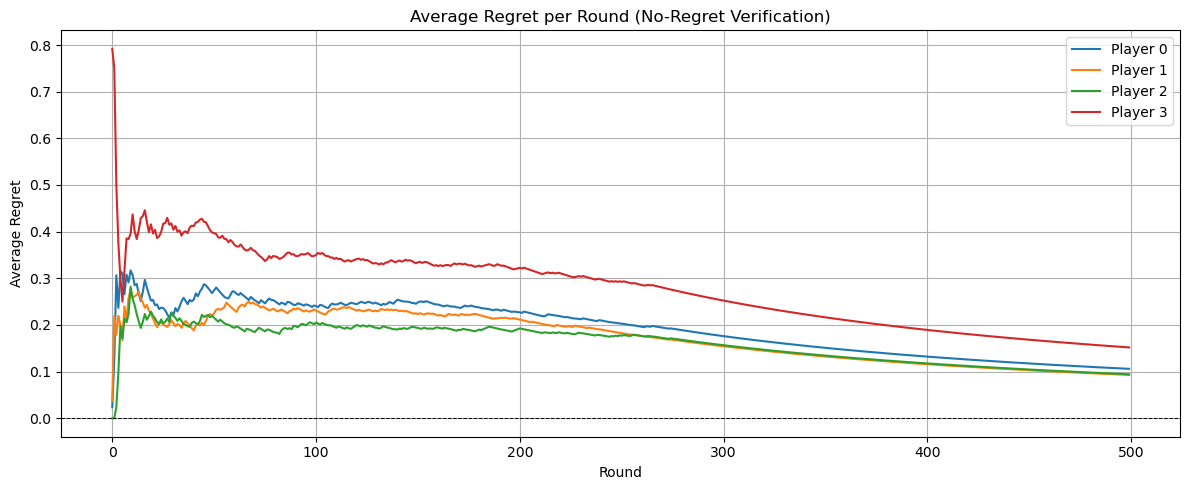

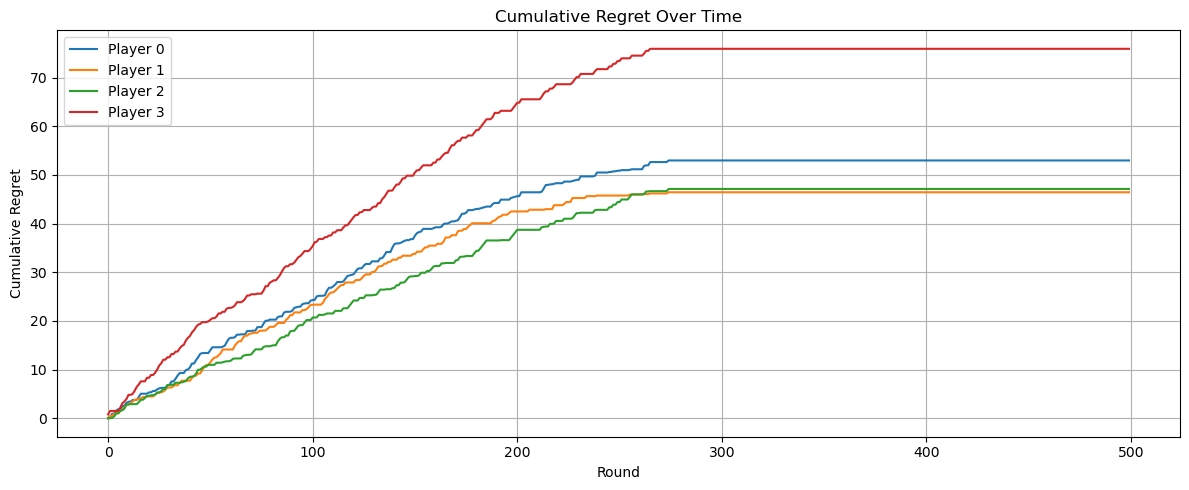

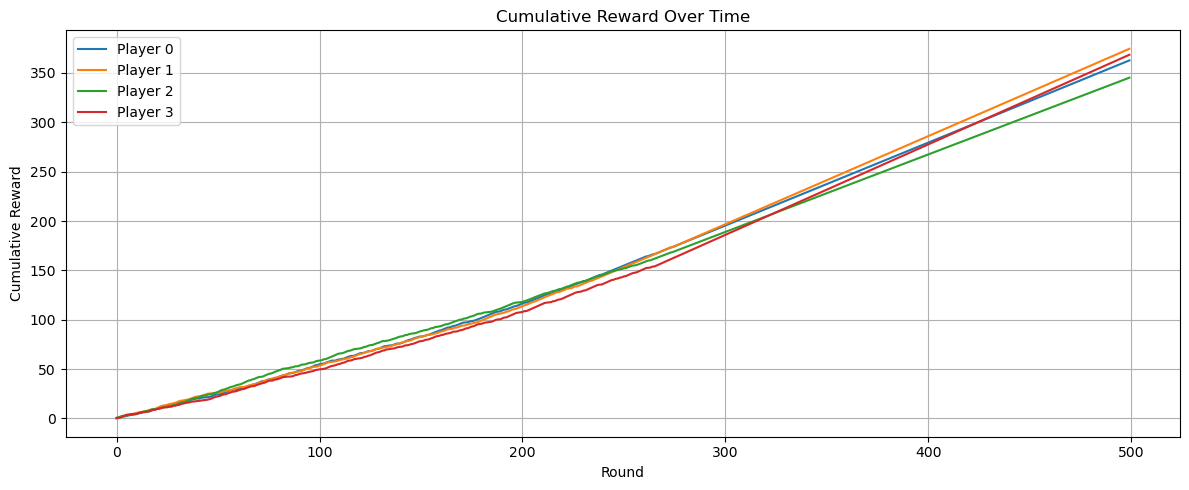

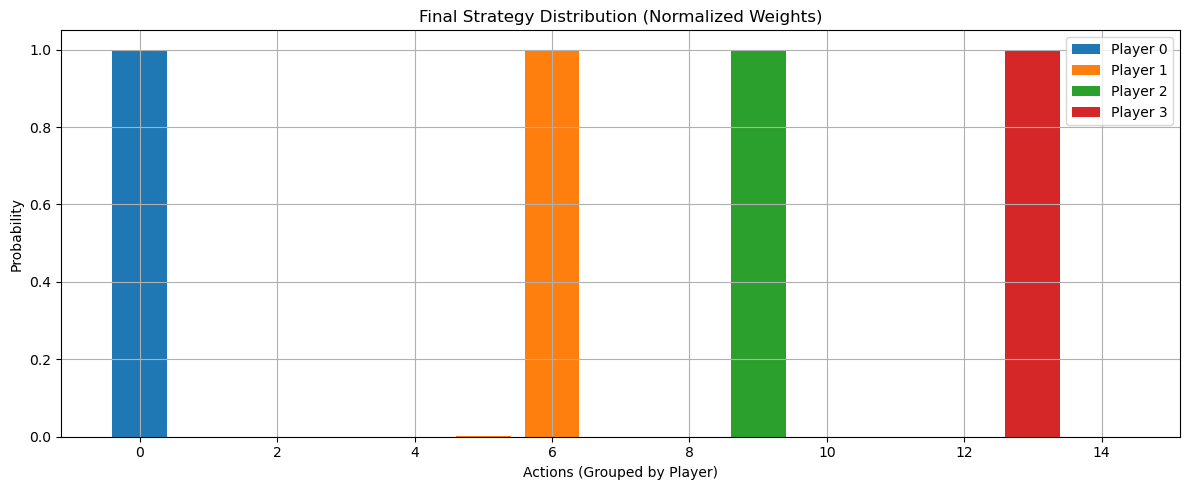

In [7]:
import matplotlib.pyplot as plt

# Plot average regret per round to verify no-regret behavior
plt.figure(figsize=(12, 5))
for i in range(num_players):
    avg_regret = np.cumsum(history_regrets[i]) / (np.arange(1, num_rounds + 1))
    plt.plot(avg_regret, label=f'Player {i}')
plt.title('Average Regret per Round (No-Regret Verification)')
plt.xlabel('Round')
plt.ylabel('Average Regret')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot cumulative regret per player
plt.figure(figsize=(12, 5))
for i in range(num_players):
    plt.plot(np.cumsum(history_regrets[i]), label=f'Player {i}')
plt.title('Cumulative Regret Over Time')
plt.xlabel('Round')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot cumulative reward per player
plt.figure(figsize=(12, 5))
for i in range(num_players):
    plt.plot(np.cumsum(history_rewards[i]), label=f'Player {i}')
plt.title('Cumulative Reward Over Time')
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot final strategy distribution for each player
plt.figure(figsize=(12, 5))
for i in range(num_players):
    plt.bar(np.arange(num_actions) + i*(num_actions + 1), weights[i] / weights[i].sum(), label=f'Player {i}')
plt.title('Final Strategy Distribution (Normalized Weights)')
plt.xlabel('Actions (Grouped by Player)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()